## 多层神经网络——解决非线性问题
## 实例28：用线性逻辑回归分析肿瘤的良性or恶性
### 1. 生成样本类

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle


#模拟数据点   
def generate(sample_size, mean, cov, diff,regression):   
    num_classes = 2 #len(diff)
    samples_per_class = int(sample_size/2)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        
    if regression==False: #one-hot  0 into the vector "1 0
        print("ssss")
        class_ind = [Y0==class_number for class_number in range(num_classes)]
        Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    X, Y = shuffle(X0, Y0)
    
    return X,Y  

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


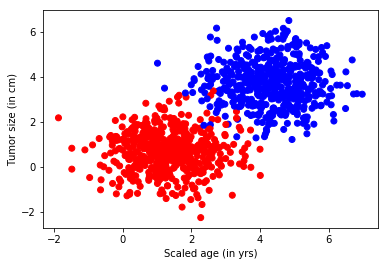

In [2]:
input_dim = 2                    
np.random.seed(10)
num_classes =2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes) 
X, Y = generate(1000, mean, cov, [3.0],True)
colors = ['r' if l == 0 else 'b' for l in Y[:]]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()
lab_dim = 1

### 2. 构建网络结构

In [3]:
# tf Graph Input
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_lables = tf.placeholder(tf.float32, [None, lab_dim])
# Set model weights
W = tf.Variable(tf.random_normal([input_dim,lab_dim]), name="weight")
b = tf.Variable(tf.zeros([lab_dim]), name="bias")

output =tf.nn.sigmoid( tf.matmul(input_features, W) + b)
cross_entropy = -(input_lables * tf.log(output) + (1 - input_lables) * tf.log(1 - output))
ser= tf.square(input_lables - output)
loss = tf.reduce_mean(cross_entropy)
err = tf.reduce_mean(ser)
optimizer = tf.train.AdamOptimizer(0.04) #尽量用这个--收敛快，会动态调节梯度
train = optimizer.minimize(loss)  # let the optimizer train

Instructions for updating:
Colocations handled automatically by placer.


### 3. 设置参数进行训练

Epoch: 0001 cost= 0.427363694 err= 0.3149222269654274
Epoch: 0002 cost= 0.275242448 err= 0.12916538752615453
Epoch: 0003 cost= 0.198488832 err= 0.07311406331136823
Epoch: 0004 cost= 0.155583516 err= 0.049487294629216194
Epoch: 0005 cost= 0.129410699 err= 0.03783809146843851
Epoch: 0006 cost= 0.111637138 err= 0.031109510990791022
Epoch: 0007 cost= 0.098720580 err= 0.026801466860342772
Epoch: 0008 cost= 0.088899851 err= 0.023845877964049578
Epoch: 0009 cost= 0.081172511 err= 0.02171302803326398
Epoch: 0010 cost= 0.074926406 err= 0.02011334609705955
Epoch: 0011 cost= 0.069766864 err= 0.018876566260587424
Epoch: 0012 cost= 0.065427810 err= 0.01789664597599767
Epoch: 0013 cost= 0.061723653 err= 0.017104446739540435
Epoch: 0014 cost= 0.058520988 err= 0.016453136381460353
Epoch: 0015 cost= 0.055721492 err= 0.015909987088525666
Epoch: 0016 cost= 0.053251043 err= 0.015451466900412925
Epoch: 0017 cost= 0.051052839 err= 0.015060284163337202
Epoch: 0018 cost= 0.049082574 err= 0.014723470641183668


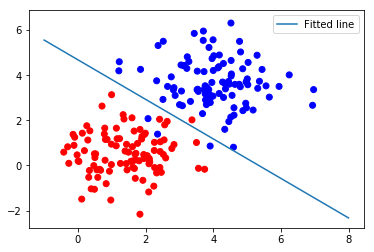

In [7]:
maxEpochs = 50
minibatchSize = 25

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(maxEpochs):
        sumerr=0
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize,:]
            y1 = np.reshape(Y[i*minibatchSize:(i+1)*minibatchSize],[-1,1])
            tf.reshape(y1,[-1,1])
            _,lossval, outputval,errval = sess.run([train,loss,output,err], feed_dict={input_features: x1, input_lables:y1})
            sumerr =sumerr+errval

        print ("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(lossval),"err=",sumerr/np.int32(len(Y)/minibatchSize))
        
    # Graphic display
    train_X, train_Y = generate(100, mean, cov, [3.0],True)
    colors = ['r' if l == 0 else 'b' for l in train_Y[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)
    #plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y)
    #plt.colorbar()


#    x1w1+x2*w2+b=0
#    x2=-x1* w1/w2-b/w2
    x = np.linspace(-1,8,200) 
    y=-x*(sess.run(W)[0]/sess.run(W)[1])-sess.run(b)/sess.run(W)[1]
    plt.plot(x,y, label='Fitted line')
    plt.legend()
    plt.show() 

## 实例29：线性多分类

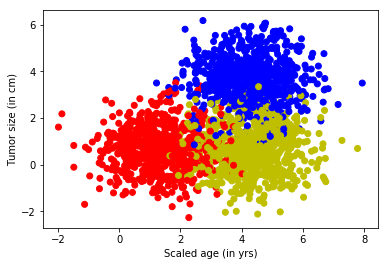

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 cost= 0.464984536 err= 1.0191999999999997
Epoch: 0002 cost= 0.355924010 err= 0.3856
Epoch: 0003 cost= 0.335220724 err= 0.3408000000000002
Epoch: 0004 cost= 0.332817644 err= 0.32320000000000015
Epoch: 0005 cost= 0.336272120 err= 0.3168000000000002
Epoch: 0006 cost= 0.341775596 err= 0.3088000000000002
Epoch: 0007 cost= 0.347882152 err= 0.3024000000000002
Epoch: 0008 cost= 0.353986651 err= 0.2992000000000002
Epoch: 0009 cost= 0.359829128 err= 0.29280000000000017
Epoch: 0010 cost= 0.365304261 err= 0.2896000000000002
Epoch: 0011 cost= 0.370378375 err= 0.2896000000000002
Epoch: 0012 cost= 0.375052452 err= 0.2832000000000002
Epoch: 0013 cost= 0.379343629 err= 0.2864000000000002
Epoch: 0014 cost= 0.383275449 err= 0.28480000000000016
Epoch: 0015 cost= 0.386874378 err= 0.2832000000000002
Epoch: 0

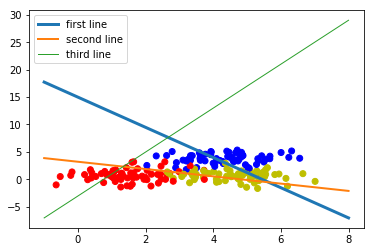

[[-1.2782756   1.7228742   1.8240309 ]
 [-0.46404395  2.5893972  -0.4549423 ]] [ 6.951592  -8.270903  -1.3872018]


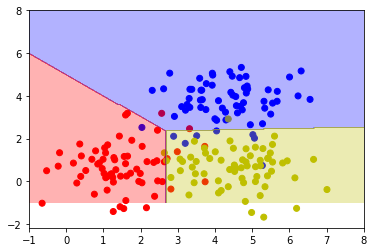

In [8]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap 
    
# 对于上面的fit可以这么扩展变成动态的
from sklearn.preprocessing import OneHotEncoder
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c     
#
    
def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        #print(X0, Y0)
    
  
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y    

 
# Ensure we always get the same amount of randomness
np.random.seed(10)

input_dim = 2
num_classes =3 
X, Y = generate(2000,num_classes,  [[3.0],[3.0,0]],False)
aa = [np.argmax(l) for l in Y]
colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]

plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()

lab_dim = num_classes
# tf Graph Input
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_lables = tf.placeholder(tf.float32, [None, lab_dim])
# Set model weights
W = tf.Variable(tf.random_normal([input_dim,lab_dim]), name="weight")
b = tf.Variable(tf.zeros([lab_dim]), name="bias")
output = tf.matmul(input_features, W) + b

z = tf.nn.softmax( output )

a1 = tf.argmax(tf.nn.softmax( output ), axis=1)#按行找出最大索引，生成数组
b1 = tf.argmax(input_lables, axis=1)
err = tf.count_nonzero(a1-b1) #两个数组相减，不为0的就是错误个数

cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels=input_lables,logits=output)
loss = tf.reduce_mean(cross_entropy)#对交叉熵取均值很有必要



optimizer = tf.train.AdamOptimizer(0.04) #尽量用这个--收敛快，会动态调节梯度
train = optimizer.minimize(loss)  # let the optimizer train

maxEpochs = 50
minibatchSize = 25

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(maxEpochs):
        sumerr=0
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize,:]
            y1 = Y[i*minibatchSize:(i+1)*minibatchSize,:]

            _,lossval, outputval,errval = sess.run([train,loss,output,err], feed_dict={input_features: x1, input_lables:y1})
            sumerr =sumerr+(errval/minibatchSize)

        print ("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(lossval),"err=",sumerr/minibatchSize)
 
    train_X, train_Y = generate(200,num_classes,  [[3.0],[3.0,0]],False)
    aa = [np.argmax(l) for l in train_Y]        
    colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)
    
    x = np.linspace(-1,8,200) 

    y=-x*(sess.run(W)[0][0]/sess.run(W)[1][0])-sess.run(b)[0]/sess.run(W)[1][0]
    plt.plot(x,y, label='first line',lw=3)

    y=-x*(sess.run(W)[0][1]/sess.run(W)[1][1])-sess.run(b)[1]/sess.run(W)[1][1]
    plt.plot(x,y, label='second line',lw=2)

    y=-x*(sess.run(W)[0][2]/sess.run(W)[1][2])-sess.run(b)[2]/sess.run(W)[1][2]
    plt.plot(x,y, label='third line',lw=1)
    
    plt.legend()
    plt.show() 
    print(sess.run(W),sess.run(b))
    

    train_X, train_Y = generate(200,num_classes,  [[3.0],[3.0,0]],False)
    aa = [np.argmax(l) for l in train_Y]        
    colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)    
    
    nb_of_xs = 200
    xs1 = np.linspace(-1, 8, num=nb_of_xs)
    xs2 = np.linspace(-1, 8, num=nb_of_xs)
    xx, yy = np.meshgrid(xs1, xs2) # create the grid
    # Initialize and fill the classification plane
    classification_plane = np.zeros((nb_of_xs, nb_of_xs))
    for i in range(nb_of_xs):
        for j in range(nb_of_xs):
            #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
            classification_plane[i,j] = sess.run(a1, feed_dict={input_features: [[ xx[i,j], yy[i,j] ]]} )
    
    
    # Create a color map to show the classification colors of each grid point
    cmap = ListedColormap([
            colorConverter.to_rgba('r', alpha=0.30),
            colorConverter.to_rgba('b', alpha=0.30),
            colorConverter.to_rgba('y', alpha=0.30)])
    # Plot the classification plane with decision boundary and input samples
    plt.contourf(xx, yy, classification_plane, cmap=cmap)
    plt.show()    


## 实例30：使用带隐藏层解决非线性问题

In [1]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np

# 网络结构：2维输入 --> 2维隐藏层 --> 1维输出

learning_rate = 1e-4
n_input  = 2
n_label  = 1
n_hidden = 2


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
#y_pred = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))
#y_pred = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))#局部最优解

#y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))

#Leaky relus  40000次 ok
layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)
  
loss=tf.reduce_mean((y_pred-y)**2)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#生成数据
X=[[0,0],[0,1],[1,0],[1,1]]
Y=[[0],[1],[1],[0]]
X=np.array(X).astype('float32')
Y=np.array(Y).astype('int16')

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

#训练
for i in range(10000):
    sess.run(train_step,feed_dict={x:X,y:Y} )

     
#计算预测值
print(sess.run(y_pred,feed_dict={x:X}))
#输出：已训练100000次

       
#查看隐藏层的输出
print(sess.run(layer_1,feed_dict={x:X}))

C:\Users\adward\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.
[[0.49758607]
 [0.50016683]
 [0.49955258]
 [0.5021333 ]]
[[0.5226183  0.        ]
 [0.53049105 0.        ]
 [0.52861726 0.        ]
 [0.53649    0.        ]]


## 练习：异或one hot

In [2]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np

# 网络结构：2维输入 --> 2维隐藏层 --> 1维输出

learning_rate = 1e-4
n_input  = 2
n_label  = 2#1
n_hidden = 100


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.truncated_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))

#1 softmax 方法
#y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])) 
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels=y,logits=y_pred)
#loss = tf.reduce_mean(cross_entropy)

#2 sigmoid方法+平方差
y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))
loss=tf.reduce_mean((y_pred-y)**2)

#3 relu方法+平方差
#layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
#y_pred = tf.maximum(layer2,0.01*layer2) 
#loss=tf.reduce_mean((y_pred-y)**2)
 

train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#生成数据
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])
X=np.array(X).astype('float32')
Y=np.array(Y).astype('int16')

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

#训练
for i in range(10000):
    sess.run(train_step,feed_dict={x:X,y:Y} )

     
#计算预测值
print(sess.run(y_pred,feed_dict={x:X}))
#输出：已训练100000次

C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


[[0.95220375 0.03481147]
 [0.01518062 0.98357517]
 [0.0157361  0.9843861 ]
 [0.98463315 0.0158883 ]]


## 实例31：mnist多层分类

In [3]:
# -*- coding: utf-8 -*-
import tensorflow as tf
# 导入 MINST 数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/data/", one_hot=True)

#参数设置
learning_rate = 0.001
training_epochs = 25
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data 输入 (img shape: 28*28)
n_classes = 10  # MNIST 列别 (0-9 ，一共10类)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer
    
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 构建模型
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# 初始化变量
init = tf.global_variables_initializer()


# 启动session
with tf.Session() as sess:
    sess.run(init)

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print (" Finished!")

    # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

## 实例32：过拟合

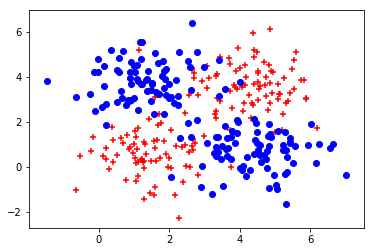

C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 0 Current loss: 0.5018894
Step: 1000 Current loss: 0.10373752
Step: 2000 Current loss: 0.086291894
Step: 3000 Current loss: 0.077173755
Step: 4000 Current loss: 0.07151143
Step: 5000 Current loss: 0.06800972
Step: 6000 Current loss: 0.066351056
Step: 7000 Current loss: 0.0651166
Step: 8000 Current loss: 0.06417427
Step: 9000 Current loss: 0.06318717
Step: 10000 Current loss: 0.06220935
Step: 11000 Current loss: 0.0611071
Step: 12000 Current loss: 0.060015637
Step: 13000 Current loss: 0.05878272
Step: 14000 Current loss: 0.05735097
Step: 15000 Current loss: 0.056046672
Step: 16000 Current loss: 0.054749347
Step: 17000 Current loss: 0.053585578
Step: 18000 Current loss: 0.05233752
Step: 19000 Current loss: 0.051035363


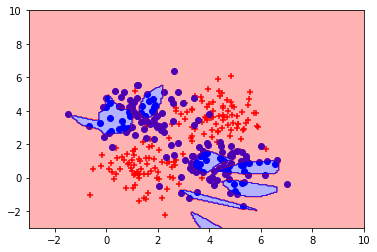

loss:
 0.11412191


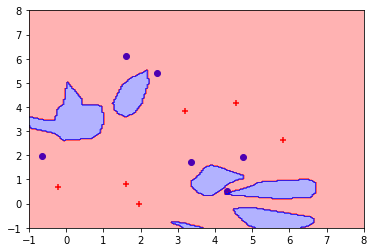

In [4]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap 
# 对于上面的fit可以这么扩展变成动态的
from sklearn.preprocessing import OneHotEncoder
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c  
    
def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))

  
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y   
    
# Ensure we always get the same amount of randomness
np.random.seed(10)

input_dim = 2
num_classes =4 
X, Y = generate(320,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
Y=Y%2
#colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
#plt.scatter(X[:,0], X[:,1], c=colors)
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

plt.show() 
Y=np.reshape(Y,[-1,1])

learning_rate = 1e-4
n_input  = 2
n_label  = 1
#n_hidden = 2#欠拟合
n_hidden = 200


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))
#y_pred = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))
#y_pred = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))#局部最优解

#y_pred = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']),biases['h2']))

#Leaky relus  40000次 ok
layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)
 
 
loss=tf.reduce_mean((y_pred-y)**2)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for i in range(20000):#  
  
  _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})

  if i % 1000 == 0:
    print ("Step:", i, "Current loss:", loss_val)

#colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
#plt.scatter(X[:,0], X[:,1], c=colors)
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

    
nb_of_xs = 200
xs1 = np.linspace(-3, 10, num=nb_of_xs)
xs2 = np.linspace(-3, 10, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 


xTrain, yTrain = generate(12,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
yTrain=yTrain%2
#colors = ['r' if l == 0.0 else 'b' for l in yTrain[:]]
#plt.scatter(xTrain[:,0], xTrain[:,1], c=colors)

xr=[]
xb=[]
for(l,k) in zip(yTrain[:],xTrain[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')


#plt.show() 
yTrain=np.reshape(yTrain,[-1,1])           
print ("loss:\n", sess.run(loss, feed_dict={x: xTrain, y: yTrain}))          

nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show()   

## 实例33：通过正则化改善过拟合
## 实例34：通过数据增强改善过拟合

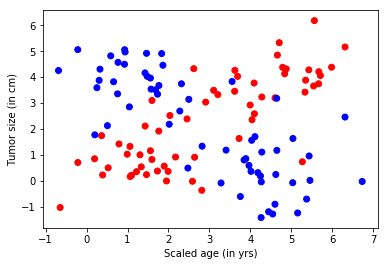

C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 0 Current loss: 0.38450366
Step: 1000 Current loss: 0.13549063
Step: 2000 Current loss: 0.11430303
Step: 3000 Current loss: 0.105851315
Step: 4000 Current loss: 0.1019517
Step: 5000 Current loss: 0.100453615
Step: 6000 Current loss: 0.09993585
Step: 7000 Current loss: 0.09968082
Step: 8000 Current loss: 0.09953847
Step: 9000 Current loss: 0.09942692
Step: 10000 Current loss: 0.099354245
Step: 11000 Current loss: 0.09930407
Step: 12000 Current loss: 0.09926791
Step: 13000 Current loss: 0.09924292
Step: 14000 Current loss: 0.099226475
Step: 15000 Current loss: 0.09921448
Step: 16000 Current loss: 0.099205494
Step: 17000 Current loss: 0.09919693
Step: 18000 Current loss: 0.099191815
Step: 19000 Current loss: 0.099188045


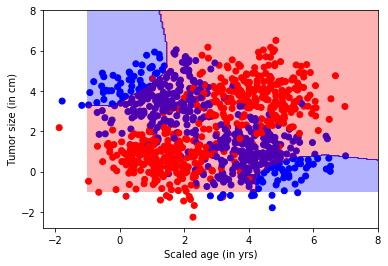

loss:
 0.09049854


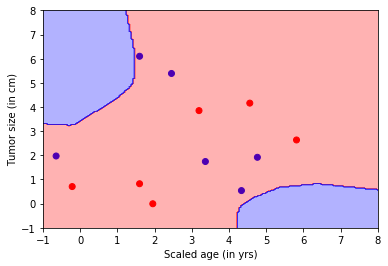

In [5]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap 
# 对于上面的fit可以这么扩展变成动态的
from sklearn.preprocessing import OneHotEncoder
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c  
    
def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))

  
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y   
    
# Ensure we always get the same amount of randomness
np.random.seed(10)

input_dim = 2
num_classes =4 
X, Y = generate(120,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
Y=Y%2
colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show() 
Y=np.reshape(Y,[-1,1])

learning_rate = 1e-4
n_input  = 2
n_label  = 1
n_hidden = 200


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))

#Leaky relus  
layer2 =tf.add(tf.matmul(layer_1, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)

reg = 0.01 
loss=tf.reduce_mean((y_pred-y)**2)+tf.nn.l2_loss(weights['h1'])*reg+tf.nn.l2_loss(weights['h2'])*reg
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for i in range(20000):

    X, Y = generate(1000,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
    Y=Y%2
    Y=np.reshape(Y,[-1,1])
  
    _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y})
    
    if i % 1000 == 0:
        print ("Step:", i, "Current loss:", loss_val)

colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")

    
nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 


xTrain, yTrain = generate(12,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
yTrain=yTrain%2
colors = ['r' if l == 0.0 else 'b' for l in yTrain[:]]
plt.scatter(xTrain[:,0], xTrain[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
#plt.show() 
yTrain=np.reshape(yTrain,[-1,1])           
print ("loss:\n", sess.run(loss, feed_dict={x: xTrain, y: yTrain}))          

nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]]} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show()   

## 实例35：dropout

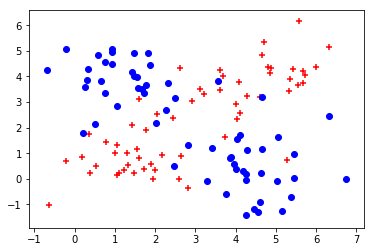

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\adward\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 0 Current loss: 0.45869648
Step: 1000 Current loss: 0.093665764
Step: 2000 Current loss: 0.09341683
Step: 3000 Current loss: 0.091144115
Step: 4000 Current loss: 0.094939746
Step: 5000 Current loss: 0.09450153
Step: 6000 Current loss: 0.09326039
Step: 7000 Current loss: 0.08985673
Step: 8000 Current loss: 0.08905965
Step: 9000 Current loss: 0.09108193
Step: 10000 Current loss: 0.09060887
Step: 11000 Current loss: 0.091397986
Step: 12000 Current loss: 0.09049434
Step: 13000 Current loss: 0.09125102
Step: 14000 Current loss: 0.08975915
Step: 15000 Current loss: 0.092092544
Step: 16000 Current loss: 0.092546806
Step: 17000 Current loss: 0.090509295
Step: 18000 Current loss: 0.09183584
Step: 19000 Current loss: 0.09077683


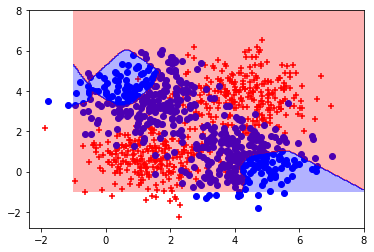

loss:
 0.06046548


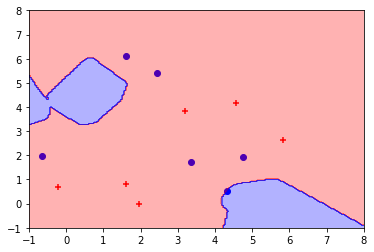

In [6]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap 
# 对于上面的fit可以这么扩展变成动态的
from sklearn.preprocessing import OneHotEncoder
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c  
    
def generate(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))

  
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y   
    
# Ensure we always get the same amount of randomness
np.random.seed(10)

input_dim = 2
num_classes =4 
X, Y = generate(120,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
Y=Y%2
#colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
#plt.scatter(X[:,0], X[:,1], c=colors)
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')
plt.show() 
Y=np.reshape(Y,[-1,1])

learning_rate = 0.01#1e-4
n_input  = 2
n_label  = 1
n_hidden = 200


x = tf.placeholder(tf.float32, [None,n_input])
y = tf.placeholder(tf.float32, [None, n_label])

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden], stddev=0.1)),
    'h2': tf.Variable(tf.random_normal([n_hidden, n_label], stddev=0.1))
	} 
biases = {
    'h1': tf.Variable(tf.zeros([n_hidden])),
    'h2': tf.Variable(tf.zeros([n_label]))
    }    


layer_1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['h1']))

keep_prob = tf.placeholder("float")
layer_1_drop = tf.nn.dropout(layer_1, keep_prob)


#Leaky relus
layer2 =tf.add(tf.matmul(layer_1_drop, weights['h2']),biases['h2'])
y_pred = tf.maximum(layer2,0.01*layer2)

reg = 0.01 
#loss=tf.reduce_mean((y_pred-y)**2)+tf.nn.l2_loss(weights['h1'])*reg+tf.nn.l2_loss(weights['h2'])*reg
loss=tf.reduce_mean((y_pred-y)**2)

global_step = tf.Variable(0, trainable=False)
decaylearning_rate = tf.train.exponential_decay(learning_rate, global_step,1000, 0.9)
#train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)
train_step = tf.train.AdamOptimizer(decaylearning_rate).minimize(loss,global_step=global_step)

#加载
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
    
for i in range(20000):

    X, Y = generate(1000,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
    Y=Y%2
    Y=np.reshape(Y,[-1,1])
  
    _, loss_val = sess.run([train_step, loss], feed_dict={x: X, y: Y,keep_prob:0.6})
   
    if i % 1000 == 0:
        print ("Step:", i, "Current loss:", loss_val)

#colors = ['r' if l == 0.0 else 'b' for l in Y[:]]
#plt.scatter(X[:,0], X[:,1], c=colors)
xr=[]
xb=[]
for(l,k) in zip(Y[:],X[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')

    
nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]],keep_prob:1.0} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 


xTrain, yTrain = generate(12,num_classes,  [[3.0,0],[3.0,3.0],[0,3.0]],True)
yTrain=yTrain%2
#colors = ['r' if l == 0.0 else 'b' for l in yTrain[:]]
#plt.scatter(xTrain[:,0], xTrain[:,1], c=colors)


xr=[]
xb=[]
for(l,k) in zip(yTrain[:],xTrain[:]):
    if l == 0.0 :
        xr.append([k[0],k[1]])        
    else:
        xb.append([k[0],k[1]])
xr =np.array(xr)
xb =np.array(xb)      
plt.scatter(xr[:,0], xr[:,1], c='r',marker='+')
plt.scatter(xb[:,0], xb[:,1], c='b',marker='o')


#plt.show() 
yTrain=np.reshape(yTrain,[-1,1])           
print ("loss:\n", sess.run(loss, feed_dict={x: xTrain, y: yTrain,keep_prob:1.0}))          

nb_of_xs = 200
xs1 = np.linspace(-1, 8, num=nb_of_xs)
xs2 = np.linspace(-1, 8, num=nb_of_xs)
xx, yy = np.meshgrid(xs1, xs2) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
        classification_plane[i,j] = sess.run(y_pred, feed_dict={x: [[ xx[i,j], yy[i,j] ]],keep_prob:1.0} )
        classification_plane[i,j] = int(classification_plane[i,j])

# Create a color map to show the classification colors of each grid point
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.30),
        colorConverter.to_rgba('b', alpha=0.30)])
# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.show() 


## 改错：xorerr1 对bias初始化错误

In [16]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(55)
np.random.seed(55)

input_data = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]  # XOR input
output_data = [[0.], [1.], [1.], [0.]]  # XOR output


hidden_nodes =2

n_input = tf.placeholder(tf.float32, shape=[None, 2], name="n_input")
n_output = tf.placeholder(tf.float32, shape=[None, 1], name="n_output")

# hidden layer's bias neuron
#b_hidden = tf.Variable(0.1, name="hidden_bias")  
b_hidden = tf.Variable(tf.random_normal([2]), name="hidden_bias")  

W_hidden = tf.Variable(tf.random_normal([2, hidden_nodes]), name="hidden_weights")

hidden = tf.sigmoid(tf.matmul(n_input, W_hidden) + b_hidden)

################
# output layer #
################
W_output = tf.Variable(tf.random_normal([hidden_nodes, 1]), name="output_weights")  # output layer's weight matrix


#不影响
#b_output =  tf.Variable(0.1, name="output_bias")#
b_output =  tf.Variable(tf.random_normal([2]), name="output_bias")#



#output = tf.nn.relu(tf.matmul(hidden, W_output)+b_output)  # 出来的都是nan calc output layer's activation
output = tf.nn.tanh(tf.matmul(hidden, W_output)+b_output)  # 出来的都是nan calc output layer's activation

#softmax
y = tf.matmul(hidden, W_output)+b_output
output = tf.nn.softmax(tf.matmul(hidden, W_output)+b_output)



#交叉熵
loss = -(n_output * tf.log(output) + (1 - n_output) * tf.log(1 - output))


optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)  # let the optimizer train

#####################
# train the network #
#####################
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(0, 2001):  
        # run the training operation
        cvalues = sess.run([train, loss, W_hidden, b_hidden, W_output],
                       feed_dict={n_input: input_data, n_output: output_data})

    # print some debug stuff
        if epoch % 200 == 0:
            print("")
            print("step: {:>3}".format(epoch))
            print("loss: {}".format(cvalues[1]))
            # print("b_hidden: {}".format(cvalues[3]))
            # print("W_hidden: {}".format(cvalues[2]))
            # print("W_output: {}".format(cvalues[4]))


    print("")
    print("input: {} | output: {}".format(input_data[0], sess.run(output, feed_dict={n_input: [input_data[0]]})))
    print("input: {} | output: {}".format(input_data[1], sess.run(output, feed_dict={n_input: [input_data[1]]})))
    print("input: {} | output: {}".format(input_data[2], sess.run(output, feed_dict={n_input: [input_data[2]]})))
    print("input: {} | output: {}".format(input_data[3], sess.run(output, feed_dict={n_input: [input_data[3]]})))



step:   0
loss: [[0.5389002 0.8756036]
 [0.8756037 0.5389002]
 [0.8756037 0.5389001]
 [0.5389002 0.8756036]]

step: 200
loss: [[0.693099   0.69319534]
 [0.69319534 0.693099  ]
 [0.69319534 0.693099  ]
 [0.693099   0.69319534]]

step: 400
loss: [[0.6931468  0.69314754]
 [0.69314754 0.6931468 ]
 [0.69314754 0.6931468 ]
 [0.6931468  0.69314754]]

step: 600
loss: [[0.6931468  0.69314754]
 [0.69314754 0.6931468 ]
 [0.69314754 0.6931468 ]
 [0.6931468  0.69314754]]

step: 800
loss: [[0.6931468  0.69314754]
 [0.69314754 0.6931468 ]
 [0.69314754 0.6931468 ]
 [0.6931468  0.69314754]]

step: 1000
loss: [[0.6931468  0.69314754]
 [0.69314754 0.6931468 ]
 [0.69314754 0.6931468 ]
 [0.6931468  0.69314754]]

step: 1200
loss: [[0.6931468  0.69314754]
 [0.69314754 0.6931468 ]
 [0.69314754 0.6931468 ]
 [0.6931468  0.69314754]]

step: 1400
loss: [[0.6931468  0.69314754]
 [0.69314754 0.6931468 ]
 [0.69314754 0.6931468 ]
 [0.6931468  0.69314754]]

step: 1600
loss: [[0.6931468  0.69314754]
 [0.69314754 0.693

## 改错：xorerr2 对bias初始化错误

In [18]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(55)
np.random.seed(55)

input_data = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]  # XOR input
output_data = [[0.], [1.], [1.], [0.]]  # XOR output


hidden_nodes =2

n_input = tf.placeholder(tf.float32, shape=[None, 2], name="n_input")
n_output = tf.placeholder(tf.float32, shape=[None, 1], name="n_output")

# hidden layer's bias neuron
#b_hidden = tf.Variable(0.1, name="hidden_bias")  
b_output =  tf.Variable(tf.random_normal([2]), name="hidden_bias")#

W_hidden = tf.Variable(tf.random_normal([2, hidden_nodes]), name="hidden_weights")

hidden = tf.sigmoid(tf.matmul(n_input, W_hidden) + b_hidden)

################
# output layer #
################
W_output = tf.Variable(tf.random_normal([hidden_nodes, 1]), name="output_weights")  # output layer's weight matrix


#不影响
#b_output =  tf.Variable(0.1, name="output_bias")
b_output =  tf.Variable(tf.random_normal([2]), name="output_bias")#


output = tf.nn.tanh(tf.matmul(hidden, W_output)+b_output)  # 

#softmax
y = tf.matmul(hidden, W_output)+b_output
output = tf.nn.softmax(tf.matmul(hidden, W_output)+b_output)



#交叉熵
loss = -(n_output * tf.log(output) + (1 - n_output) * tf.log(1 - output))



optimizer = tf.train.AdamOptimizer(0.01) 
train = optimizer.minimize(loss)  # let the optimizer train

#####################
# train the network #
#####################
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(0, 2001):  
        # run the training operation
        cvalues = sess.run([train, loss, W_hidden, b_hidden, W_output],
                       feed_dict={n_input: input_data, n_output: output_data})

    # print some debug stuff
        if epoch % 200 == 0:
            print("")
            print("step: {:>3}".format(epoch))
            print("loss: {}".format(cvalues[1]))
            # print("b_hidden: {}".format(cvalues[3]))
            # print("W_hidden: {}".format(cvalues[2]))
            # print("W_output: {}".format(cvalues[4]))


    print("")
    print("input: {} | output: {}".format(input_data[0], sess.run(output, feed_dict={n_input: [input_data[0]]})))
    print("input: {} | output: {}".format(input_data[1], sess.run(output, feed_dict={n_input: [input_data[1]]})))
    print("input: {} | output: {}".format(input_data[2], sess.run(output, feed_dict={n_input: [input_data[2]]})))
    print("input: {} | output: {}".format(input_data[3], sess.run(output, feed_dict={n_input: [input_data[3]]})))


step:   0
loss: [[2.3497488  0.10025482]
 [0.10025482 2.3497486 ]
 [0.10025482 2.3497486 ]
 [2.3497488  0.10025482]]

step: 200
loss: [[0.71068716 0.6759096 ]
 [0.6759096  0.71068716]
 [0.67590946 0.71068716]
 [0.71068716 0.6759096 ]]

step: 400
loss: [[0.69314647 0.6931479 ]
 [0.69314784 0.69314647]
 [0.69314784 0.69314647]
 [0.69314647 0.6931479 ]]

step: 600
loss: [[0.69314694 0.6931474 ]
 [0.6931474  0.69314694]
 [0.69314736 0.69314694]
 [0.69314694 0.6931474 ]]

step: 800
loss: [[0.69314694 0.6931474 ]
 [0.6931474  0.69314694]
 [0.69314736 0.69314694]
 [0.69314694 0.6931474 ]]

step: 1000
loss: [[0.69314694 0.6931474 ]
 [0.6931474  0.69314694]
 [0.6931474  0.69314694]
 [0.69314694 0.6931474 ]]

step: 1200
loss: [[0.69314694 0.6931474 ]
 [0.6931474  0.69314694]
 [0.69314736 0.69314694]
 [0.69314694 0.6931474 ]]

step: 1400
loss: [[0.69314694 0.6931474 ]
 [0.6931474  0.69314694]
 [0.6931474  0.69314694]
 [0.69314694 0.6931474 ]]

step: 1600
loss: [[0.69314694 0.6931474 ]
 [0.693147

In [20]:
# -*- coding: utf-8 -*-

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(55)
np.random.seed(55)

input_data = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]  # XOR input
output_data = [[0.], [1.], [1.], [0.]]  # XOR output


hidden_nodes =2

n_input = tf.placeholder(tf.float32, shape=[None, 2], name="n_input")
n_output = tf.placeholder(tf.float32, shape=[None, 1], name="n_output")

# hidden layer's bias neuron
#b_hidden = tf.Variable(0.1, name="hidden_bias")  
b_output =  tf.Variable(tf.random_normal([2]), name="hidden_bias")#

W_hidden = tf.Variable(tf.random_normal([2, hidden_nodes]), name="hidden_weights")

hidden = tf.sigmoid(tf.matmul(n_input, W_hidden) + b_hidden)

################
# output layer #
################
W_output = tf.Variable(tf.random_normal([hidden_nodes, 1]), name="output_weights")  # output layer's weight matrix


#不影响
#b_output =  tf.Variable(0.1, name="output_bias")
b_output =  tf.Variable(tf.random_normal([2]), name="output_bias")#


output = tf.nn.tanh(tf.matmul(hidden, W_output)+b_output)  

#cross_entropy = -tf.reduce_sum(n_output * tf.log(output))# 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=n_output, logits=output)

loss = tf.reduce_mean(cross_entropy)  # mean the cross_entropy

optimizer = tf.train.AdamOptimizer(0.01)
train = optimizer.minimize(loss)  # let the optimizer train

#####################
# train the network #
#####################
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(0, 2001):  
        # run the training operation
        cvalues = sess.run([train, loss, W_hidden, b_hidden, W_output],
                       feed_dict={n_input: input_data, n_output: output_data})

    # print some debug stuff
        if epoch % 200 == 0:
            print("")
            print("step: {:>3}".format(epoch))
            print("loss: {}".format(cvalues[1]))
            # print("b_hidden: {}".format(cvalues[3]))
            # print("W_hidden: {}".format(cvalues[2]))
            # print("W_output: {}".format(cvalues[4]))


    print("")
    print("input: {} | output: {}".format(input_data[0], sess.run(output, feed_dict={n_input: [input_data[0]]})))
    print("input: {} | output: {}".format(input_data[1], sess.run(output, feed_dict={n_input: [input_data[1]]})))
    print("input: {} | output: {}".format(input_data[2], sess.run(output, feed_dict={n_input: [input_data[2]]})))
    print("input: {} | output: {}".format(input_data[3], sess.run(output, feed_dict={n_input: [input_data[3]]})))


step:   0
loss: 0.760709285736084

step: 200
loss: 0.6943553686141968

step: 400
loss: 0.693148136138916

step: 600
loss: 0.6931472420692444

step: 800
loss: 0.6931471824645996

step: 1000
loss: 0.6931471824645996

step: 1200
loss: 0.6931471824645996

step: 1400
loss: 0.6931471824645996

step: 1600
loss: 0.6931471824645996

step: 1800
loss: 0.6931471824645996

step: 2000
loss: 0.6931471824645996

input: [0.0, 0.0] | output: [[-0.9966443 -0.9966645]]
input: [0.0, 1.0] | output: [[0.9974246 0.997409 ]]
input: [1.0, 0.0] | output: [[0.9971643  0.99714714]]
input: [1.0, 1.0] | output: [[0.99797374 0.99796146]]
